## 머신러닝 차원축소 PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp

In [4]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [15]:
# X_train은 3차원 배열
# 한 개의 이미지는 2차원 배열 
# 한 개의 이미지 2차원 배열 -> 1차원 배열
# (60000, 28, 28) -> (60000, 784)
# 이유 2가지: PCA 적용하기 위해, 전통적 머신러닝을 적용하기 위해서(n, feature의 개수)

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

---

- reshape -1에 대해

In [8]:
tmp = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
tmp.shape

(3, 4)

In [9]:
tmp.size

12

In [10]:
tmp.reshape(6,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [11]:
tmp.reshape(-1,2) # tmp.size / 2

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [12]:
tmp.reshape(-1,2,2).shape # -1 => 3
# -1은 한 번만 쓸 수 있다

(3, 2, 2)

> DataFrame으로 자료형 변환

In [16]:
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test)

In [17]:
# X_train의 통계
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [18]:
y_train.unique() # 레이블: 숫자

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [19]:
y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

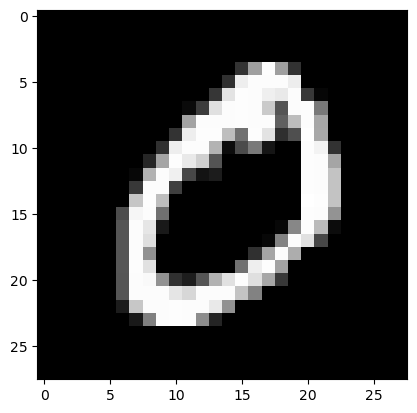

In [20]:
# 이미지 확인
plt.imshow(X_train.loc[1,:].values.reshape(28,28), cmap=plt.get_cmap('gray'))

In [22]:
# 이미지 확인 함수
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape(28,28)
    plt.title(f'Example: {example}, Label: {label}')
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

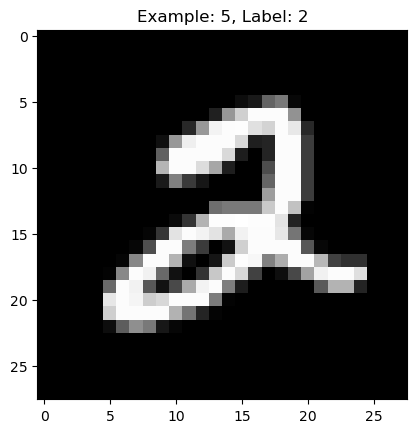

In [23]:
view_digit(5)

- PCA(Principal Component Analysis) 적용 

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=784, random_state=2018)
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.shape

(60000, 784)

In [26]:
# 784개의 주성분 -> 원본 데이터의 분산을 얼마나 표현할 수 있는지
sum(pca.explained_variance_ratio_)

0.9999999999999991

> 부연 설명

In [27]:
pca_example = PCA(n_components=2)
pca_example.fit_transform(np.array([[1,1],[2,2],[3,3]]))

array([[-1.41421356e+00,  2.37213427e-17],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.41421356e+00,  2.37213427e-17]])

In [28]:
pca_example.explained_variance_ratio_

array([1.00000000e+00, 2.81351049e-34])

In [29]:
pca_example = PCA(n_components=3)
pca_example.fit_transform(np.array([[1,1,2],[2,2,3],[3,3,4]]))

array([[-1.73205081e+00,  2.73910471e-17, -9.03695346e-65],
       [ 0.00000000e+00, -0.00000000e+00,  5.75568235e-49],
       [ 1.73205081e+00,  2.73910471e-17, -9.03695346e-65]])

In [30]:
pca_example.explained_variance_ratio_

array([1.00000000e+00, 2.50089821e-34, 5.52131323e-98])

In [31]:
pca_example = PCA(n_components=3)
pca_example.fit_transform(np.array([[1,4,2],[2,6,3],[3,3,5]]))

array([[-1.17851130e+00, -1.22474487e+00,  3.95988378e-17],
       [-1.17851130e+00,  1.22474487e+00,  3.95988378e-17],
       [ 2.35702260e+00,  1.07072218e-16,  3.95988378e-17]])

In [ ]:
pca_example.explained_variance_ratio_

> Explained variance ratio

In [32]:
evr_df = pd.DataFrame(pca.explained_variance_ratio_)
evr_df.head()

,0
0,0.097047
1,0.070959
2,0.061691
3,0.053894
4,0.048688


In [34]:
evr_df['cumsum'] = evr_df.cumsum()
evr_df.head(10)

,0,cumsum
0,0.097047,0.097047
1,0.070959,0.168006
2,0.061691,0.229697
3,0.053894,0.283591
4,0.048688,0.332279
5,0.043122,0.375401
6,0.032719,0.408121
7,0.028839,0.436960
8,0.027620,0.464580
9,0.023570,0.488150


In [35]:
evr_df['cumsum'][[9,19,49,99,199,299]]
# 100개 정도 사용하면 91프로까지 설명이 된다. 
# 정보손실을 최소화하면서 특징을 축소하는 것이 차원축소이다.

9      0.488150
19     0.643581
49     0.824647
99     0.914629
199    0.966447
299    0.986229
Name: cumsum, dtype: float64

In [36]:
evr_df.T.loc[[0],:9]

,0,1,2,3,4,5,6,7,8,9
0,0.097047,0.070959,0.061691,0.053894,0.048688,0.043122,0.032719,0.028839,0.02762,0.02357


<Axes: >

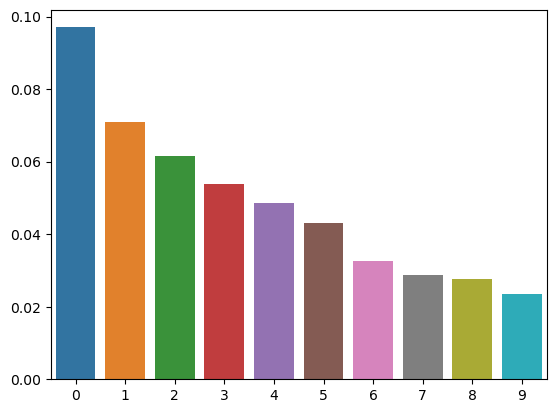

In [37]:
# 주성분 별 explained variance ratio
sns.barplot(evr_df.T.loc[[0],:9])

- 2차원 축소 시각화

In [39]:
tempDF = X_train_PCA.loc[:,:1] # (60000, 2)
tempDF = pd.concat([tempDF, y_train], axis=1) # (60000, 3)
tempDF.columns = ['First vector', 'Second vector', 'Label']
tempDF.head()
# sns.lmplot()

,First vector,Second vector,Label
0,123.932589,-312.674262,5
1,1011.718376,-294.857038,0
2,-51.849608,392.173153,4
3,-799.127037,-607.197217,1
4,-382.754942,730.542867,9


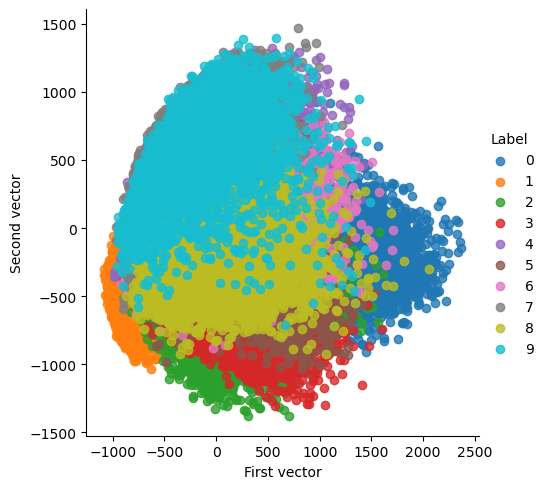

In [41]:
sns.lmplot(x='First vector', y='Second vector', hue='Label',data=tempDF, fit_reg=False)

- 머신러닝 모델에 적용 (KNN)

> 전체 특성 활용(PCA 적용 전)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred = knn_5.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



> PCA 적용한 데이터 활용(주성분 2개)
- 2개, 10개

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784, random_state=2018)
X_train_PCA = pca.fit_transform(X_train) # PCA fit에는 Train Set만 사용
X_test_PCA = pca.transform(X_test) # Train set으로 fitting된 pca를 사용하여 transform만 적용

In [51]:
X_train_PCA.shape, X_test_PCA.shape

((60000, 784), (10000, 784))

In [53]:
X_train_PCA[:,:2].shape

(60000, 2)

In [55]:
knn_5_2d = KNeighborsClassifier(n_neighbors=5)
knn_5_2d.fit(X_train_PCA[:,:2], y_train)
y_pred = knn_5_2d.predict(X_test_PCA[:,:2]) # 1초 미만 빠른 계산 속도
print(classification_report(y_test, y_pred))

# 이진분류에서의 40%와는 의미가 다르다. 10개 중에 랜덤으로 맞출 확률은 10%인데 
# 해당 모델은 42%의 정확도를 가지고 있으므로 이진분류에서의 42%에 비해 나쁜 수치가 아니다.

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       980
           1       0.86      0.92      0.89      1135
           2       0.28      0.30      0.29      1032
           3       0.44      0.49      0.46      1010
           4       0.35      0.44      0.39       982
           5       0.21      0.18      0.19       892
           6       0.29      0.28      0.28       958
           7       0.41      0.43      0.42      1028
           8       0.24      0.14      0.18       974
           9       0.32      0.21      0.25      1009

    accuracy                           0.42     10000
   macro avg       0.40      0.41      0.40     10000
weighted avg       0.40      0.42      0.41     10000



In [56]:
# 10개의 주성분으로 KNN(k=5)인 모델을 만들고 test set에 평가
knn_5_2d = KNeighborsClassifier(n_neighbors=5)
knn_5_2d.fit(X_train_PCA[:,:10], y_train)
y_pred = knn_5_2d.predict(X_test_PCA[:,:10])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.92      0.90      0.91      1010
           4       0.91      0.90      0.91       982
           5       0.91      0.91      0.91       892
           6       0.95      0.96      0.96       958
           7       0.95      0.92      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.87      0.88      0.88      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



- 이미지 복원

> 2d

In [62]:
pca_2d = PCA(n_components=2, random_state=2018)
X_train_PCA_2d = pca_2d.fit_transform(X_train)
X_train_PCA_2d.shape

(60000, 2)

In [63]:
X_train_PCA_2d_r = pca_2d.inverse_transform(X_train_PCA_2d)
X_train_PCA_2d_r.shape

(60000, 784)

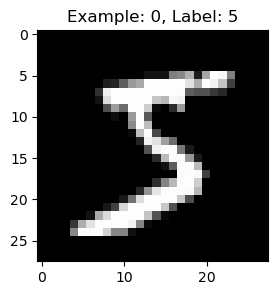

In [67]:
plt.figure(figsize=(3,3))
view_digit(0)

In [69]:
def view_digit_recovered(X_train_recovered, example):
    plt.figure(figsize=(3,3))
    label = y_train.loc[example]
    image = X_train_recovered[example,:].reshape(28,28)
    plt.title(f'Example (recovered): {example}, Label: {label}')
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

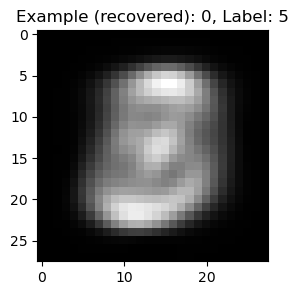

In [70]:
view_digit_recovered(X_train_PCA_2d_r, 0)

In [73]:
pca_10d = PCA(n_components=10, random_state=2018)
X_train_PCA_10d = pca_10d.fit_transform(X_train)
X_train_PCA_10d.shape

(60000, 10)

In [75]:
# 복원
X_train_PCA_10d_r = pca_10d.inverse_transform(X_train_PCA_10d)
X_train_PCA_10d_r.shape

(60000, 784)

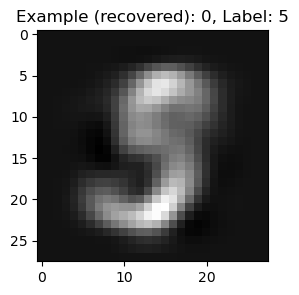

In [77]:
view_digit_recovered(X_train_PCA_10d_r, 0)

### PCA외 다른 차원축소 방법

- 점진적 PCA (Incremental PCA)

In [83]:
from sklearn.decomposition import IncrementalPCA

incremental_pca = IncrementalPCA(n_components=784, batch_size=10000) # batch_size는 784보다 크도록
X_train_incPCA = incremental_pca.fit_transform(X_train)

In [81]:
tempDF = pd.DataFrame(X_train_incPCA).loc[:,:1] # (60000, 2)
tempDF = pd.concat([tempDF, y_train], axis=1) # (60 000, 3)
tempDF.columns = ['First vector', 'Second vector', 'Label']
tempDF.head()

,First vector,Second vector,Label
0,123.932589,312.674262,5
1,1011.718376,294.857038,0
2,-51.849608,-392.173153,4
3,-799.127037,607.197217,1
4,-382.754942,-730.542867,9


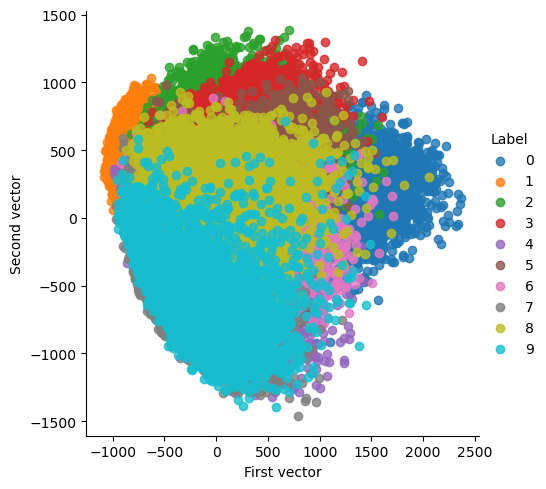

In [82]:
sns.lmplot(x='First vector', y='Second vector', hue='Label',data=tempDF, fit_reg=False)